In [1]:
import os 
import cv2
import numpy as np
from PIL import Image
from tensorflow import keras
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.activations import relu
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import glob as gb
import pandas as pd
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
import re
from keras.preprocessing.image import img_to_array
from tqdm import tqdm
from PIL import Image

In [2]:
x_train_path = '/kaggle/input/landscape-image-colorization/landscape Images/gray'
y_train_path = '/kaggle/input/landscape-image-colorization/landscape Images/color'


In [3]:
# input_gene=ImageDataGenerator(rotation_range=30,            # Rotate images up to 30 degrees
#                 width_shift_range=0.2,        # Shift the width by up to 20%
#                 height_shift_range=0.2,       # Shift the height by up to 20%
#                 shear_range=0.2,              # Shear by up to 20%
#                 zoom_range=0.2,               # Zoom in/out by up to 20%
#                 horizontal_flip=True,         # Enable horizontal flipping
#                 brightness_range=[0.8, 1.2])
# input_batch=input_gene.flow_from_directory(
#     directory=x_train_path,  
#     target_size=(160,160),
#     class_mode=None,
#     batch_size=32
#     # seed=42
# )
# # output_gene=ImageDataGenerator(rescale=1./255)
# # output_batch=output_gene.flow_from_directory(
# #     '/kaggle/input/landscape-image-colorization/landscape Images/',  
# #     # target_size=(320,320,3),
# #     class_mode=None,
# #     batch_size=32,
# #     seed=42)

In [4]:
# len(os.listdir(train_path) )

In [5]:
# size = []
# images_path=[]
# for folder_name in os.listdir(train_path):
#     folder_path = os.path.join(train_path,folder_name)
#     for image in os.listdir(folder_path):
#         try:
#             images_path.append(image)
#             img_path = os.path.join(folder_path,image)
#             img = plt.imread(img_path)
#             size.append(img.shape)
#         except:
#             pass

In [6]:
# pd.Series(size).value_counts()

In [7]:
gray_img=[]
color_img=[]
for img in os.listdir(x_train_path):
    image_path = os.path.join(x_train_path,img)
    g=Image.open(image_path)
    new_size = (224,224)
    resized_img = g.resize(new_size)
    gray_img.append(resized_img)
for img in os.listdir(y_train_path):
    image_path = os.path.join(y_train_path,img)
    g=Image.open(image_path)
    new_size = (224, 224)
    resized_img = g.resize(new_size)
    color_img.append(resized_img)
    

In [8]:
gray_img=np.array(gray_img)
color_img=np.array(color_img)
gray_img=np.expand_dims(gray_img,axis=-1)

In [9]:
gray_img=gray_img[:6000]
color_img=color_img[:6000]

In [10]:
print(gray_img.shape)
print(color_img.shape)

(6000, 224, 224, 1)
(6000, 224, 224, 3)


In [11]:
# # to get the files in proper order
# def sorted_alphanumeric(data):  
#     convert = lambda text: int(text) if text.isdigit() else text.lower()
#     alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)',key)]
#     return sorted(data,key = alphanum_key)
# # defining the size of the image
# SIZE = 160
# color_img = []
# path = '../input/landscape-image-colorization/landscape Images/color'
# files = os.listdir(path)
# files = sorted_alphanumeric(files)
# for i in tqdm(files):    
#     if i == '6000.jpg':
#         break
#     else:    
#         img = cv2.imread(path + '/'+i,1)
#         # open cv reads images in BGR format so we have to convert it to RGB
#         img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#         #resizing image
#         img = cv2.resize(img, (SIZE, SIZE))
#         img = img.astype('float32') / 255.0
#         color_img.append(img_to_array(img))


# gray_img = []
# path = '../input/landscape-image-colorization/landscape Images/gray'
# files = os.listdir(path)
# files = sorted_alphanumeric(files)
# for i in tqdm(files):
#      if i == '6000.jpg':
#         break
#      else: 
#         img = cv2.imread(path + '/'+i,1)

#         #resizing image
#         img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#         img = cv2.resize(img, (SIZE, SIZE))
#         img = img.astype('float32') / 255.0
#         gray_img.append(img_to_array(img))
         

In [12]:
# img_input= preprocessing(x_train_path,(160,160),input=1)
# # img_output= preprocessing(y_train_path,(160,160),input=0)

In [13]:
# print(len(gray_img))
# print(len(color_img))
# # print(len(test_in))

In [14]:
# color_img=np.array(color_img)
# gray_img=np.array(gray_img)

In [15]:
# print(gray_img.shape)
# print(color_img.shape)

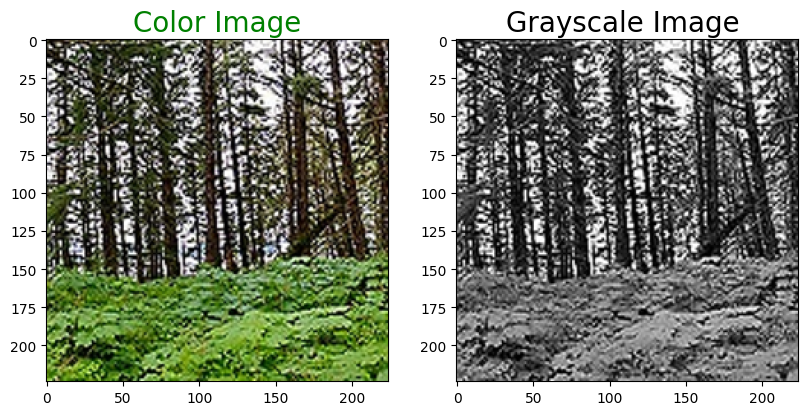

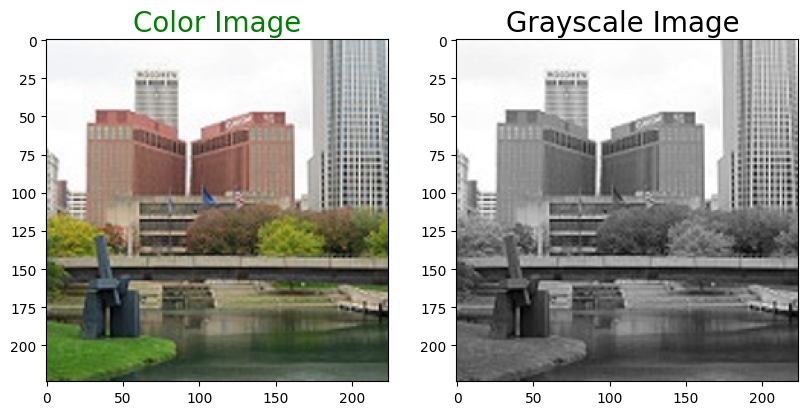

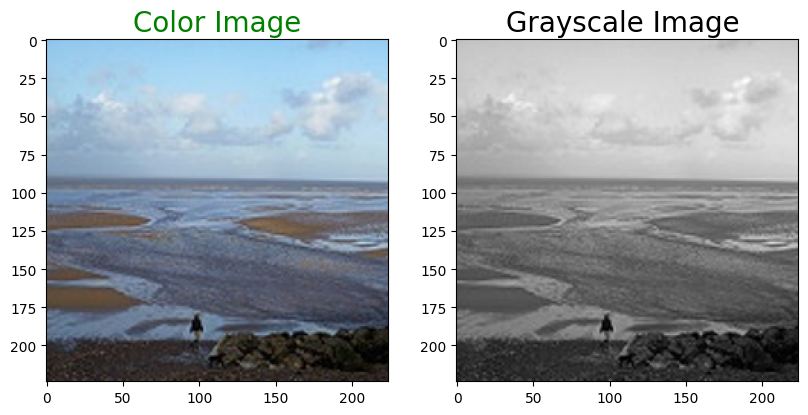

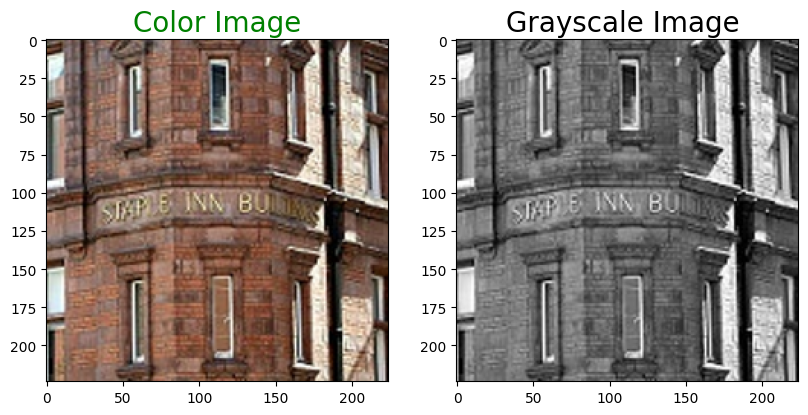

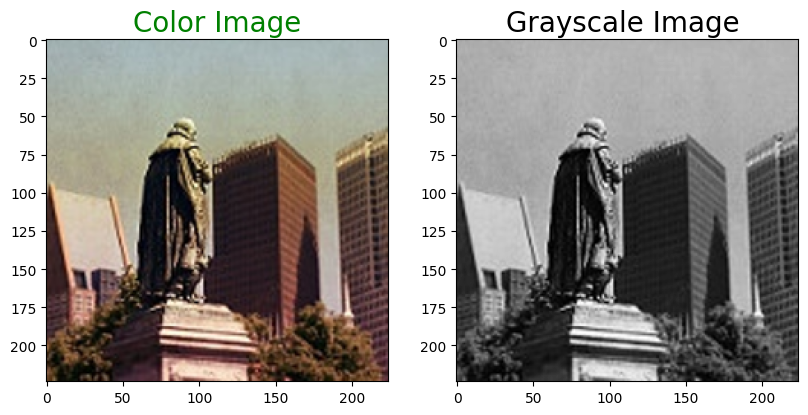

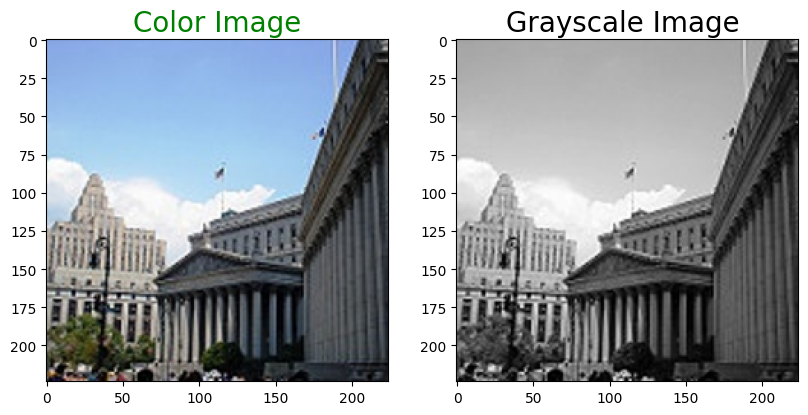

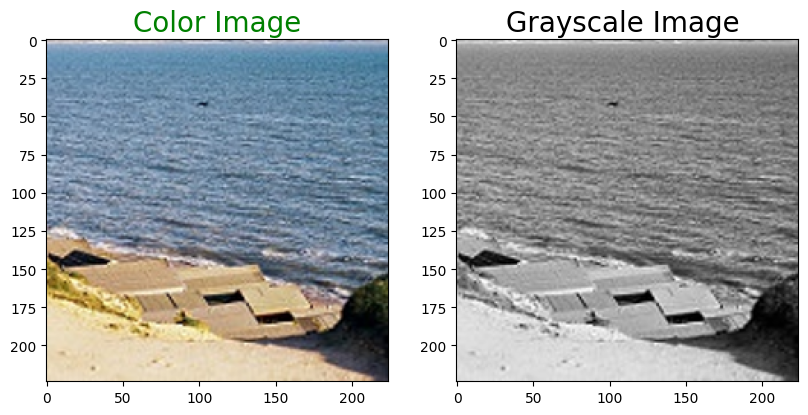

In [50]:
def plot_images(color,grayscale):
    plt.figure(figsize=(15,15))
    plt.subplot(1,3,1)
    plt.title('Color Image', color = 'green', fontsize = 20)
    plt.imshow(color)
    plt.subplot(1,3,2)
    plt.title('Grayscale Image ', color = 'black', fontsize = 20)
    plt.imshow(grayscale,cmap='gray')
   
    plt.show()
for i in range(3,10):
     plot_images(color_img[i],gray_img[i])

In [17]:
# inputt= np.array(inputt)
# outputt= np.array(outputt)
# testt= np.array(testt)
# inputt=np.expand_dims(inputt,axis=-1)

In [18]:
# testt.shape

In [19]:
# type(inputt)

In [20]:
# sss=[]
# for img in testt:
#     sss.append(img.shape)
# set(sss)

In [21]:
# os.mkdir('train_gray')
# os.mkdir('test_gray')

In [22]:
# def make_gray(path,folder_to_save):
#     for folder_name in os.listdir(path):
#         folder_path = os.path.join(path,folder_name)
#         for image_name in os.listdir(folder_path):
#             try:
#                 image_path = os.path.join(folder_path,image_name)
#                 image =cv2.imread(image_path)
#                 image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
#                 image = cv2.resize(image,(320,320))
#                 image = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
#                 # img_name = os.path.join(folder_to_save,'gray',image_name)
#                 location = os.path.join(folder_to_save,image_name)
#                 cv2.imwrite(location,image)
#             except:
#                 pass

In [23]:
# make_gray(train_path,'/kaggle/working/train_gray')

In [24]:
# len(os.listdir('/kaggle/working/train_gray'))

In [25]:
len(os.listdir('/kaggle/input/landscape-image-colorization/landscape Images/color'))

7129

In [26]:
def showimg (img):
    img = plt.imshow(img,cmap='gray')
    plt.axis('off')
    plt.show()

In [27]:
def u_net(h=(224,224,1)):
  gg=layers.Input(shape=h)
  x= gg
  conv =[]
  f=64

  #down_sampling
  for i in range (4):
    x= layers.Conv2D(f,3,activation='relu',padding='same')(x)
    x= layers.Conv2D(f,3,activation='relu',padding='same')(x)
    conv.append(x)
    x= layers.MaxPooling2D()(x)
    f*=2

  
  #bottle-neck
  x= layers.Conv2D(f,3,activation='relu',padding='same')(x)
  x= layers.Conv2D(f,3,activation='relu',padding='same')(x)


  ff=512
  j= len(conv)-1
  #up-sampling
  for i in range(4):
    x=layers.Conv2DTranspose(ff,2,strides=(2,2),padding='same')(x)
    x=layers.Concatenate(axis=3)([x,conv[j]])
    x= layers.Conv2D(ff,3,activation='relu',padding='same')(x)
    x= layers.Conv2D(ff,3,activation='relu',padding='same')(x)
    ff//=2
    j-=1


  output = layers.Conv2D(3,1,padding='same')(x)
  model = models.Model(inputs=gg,outputs=output)
  return model

In [28]:
model = u_net()
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mse'])

In [29]:
# input_datagen = ImageDataGenerator()  # Adjust parameters as needed
# input_gen = input_datagen.flow(
#     train_in,
#     class_mode=None,
#     batch_size=32,
#     seed=42
# )

# # Output Image Data Generator
# output_datagen = ImageDataGenerator()  # Adjust parameters as needed
# output_gen = output_datagen.flow(
#     train_ot,
#     class_mode=None,
#     batch_size=32,
#     seed=42
# )

NameError: name 'train_in' is not defined

In [ ]:
# def combined_generator(x, y):
#     for i in range(len(x)):
#         x_ = x[i].reshape(1,320,320,1)
#         y_ = y[i].reshape(1,320,320,3)
#         yield (x_, y_)


In [30]:
model.fit(gray_img,color_img,batch_size=32,epochs=10)

Epoch 1/10


I0000 00:00:1728588186.413842     470 service.cc:145] XLA service 0x79f810026fe0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1728588186.413911     470 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1728588186.413932     470 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1728588280.008741     470 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


188/188 ━━━━━━━━━━━━━━━━━━━━ 340s 1s/step - loss: 395205344.0000 - mse: 395205344.0000
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 184s 977ms/step - loss: 605.7733 - mse: 605.7733
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 185s 982ms/step - loss: 472.6233 - mse: 472.6234
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 185s 984ms/step - loss: 425.6421 - mse: 425.6421
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 185s 985ms/step - loss: 416.2039 - mse: 416.2039
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 185s 986ms/step - loss: 405.9419 - mse: 405.9418
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 186s 989ms/step - loss: 383.4601 - mse: 383.4601
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 187s 997ms/step - loss: 376.1788 - mse: 376.1789
Epoch 9/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 188s 999ms/step - loss: 361.4484 - mse: 361.4484
Epoch 10/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 188s 998ms/step - loss: 362.5691 - mse: 362.5691


In [31]:
test_gray = gray_img[6000:6500]
test_color = color_img[6000:6500]

In [33]:
test_gray.shape

(0, 224, 224, 1)

In [44]:
gggray = gray_img[3:10]
ggrgb = color_img[3:10]

In [45]:
predicted=model.predict(gggray)


1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step


In [53]:
def plot_images(color,grayscale,predicted):
    plt.figure(figsize=(15,15))
    plt.subplot(1,3,1)
    plt.title('Color Image', color = 'green', fontsize = 20)
    plt.imshow(color)
    plt.subplot(1,3,2)
    plt.title('Grayscale Image ', color = 'black', fontsize = 20)
    plt.imshow(grayscale,cmap='gray')
    plt.subplot(1,3,3)
    plt.title('Predicted Image ', color = 'Red', fontsize = 20)
    plt.imshow(predicted)
   
    plt.show()


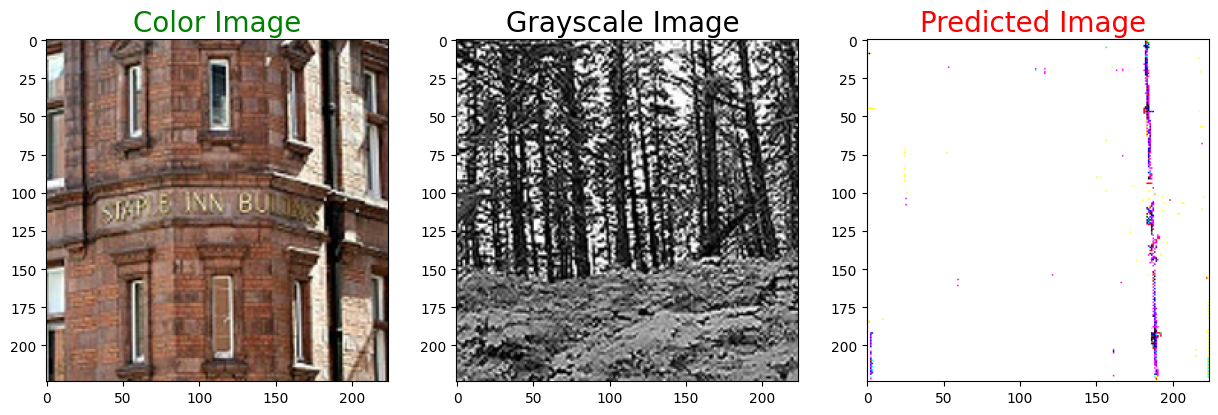

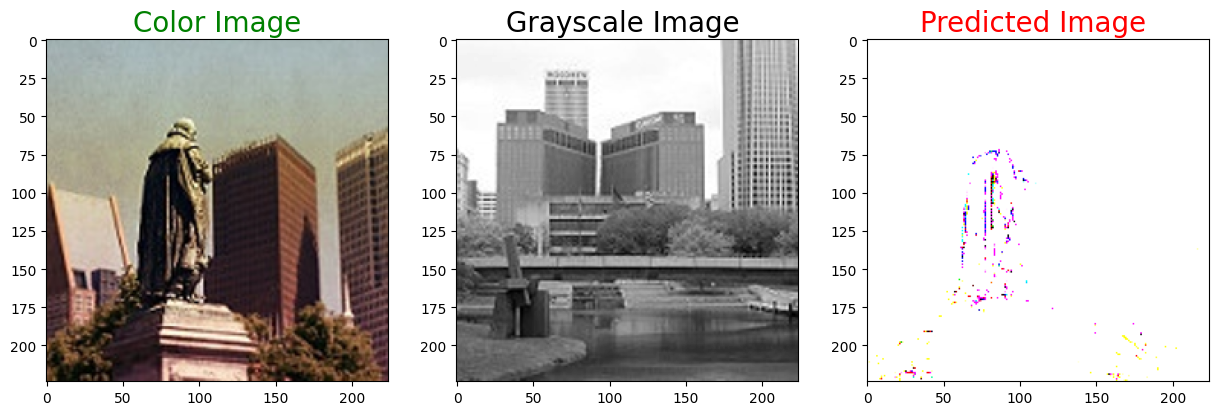

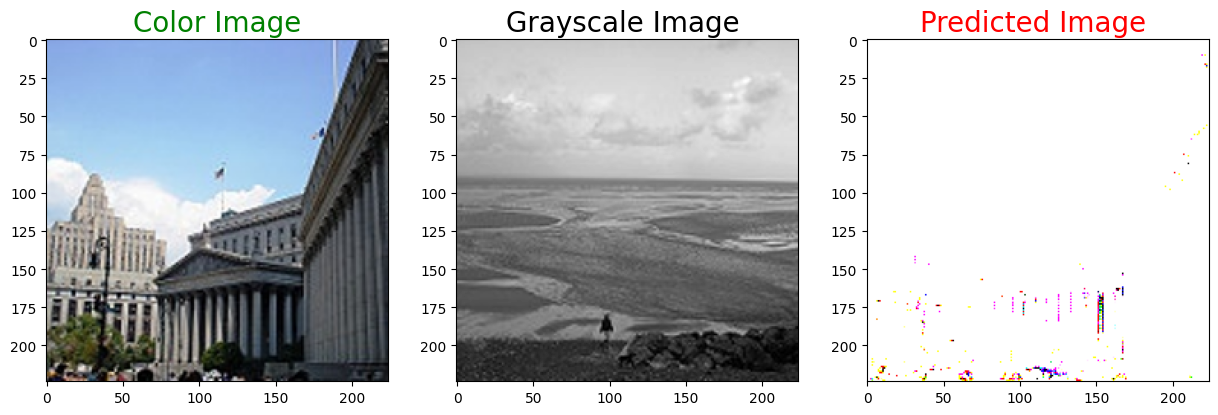

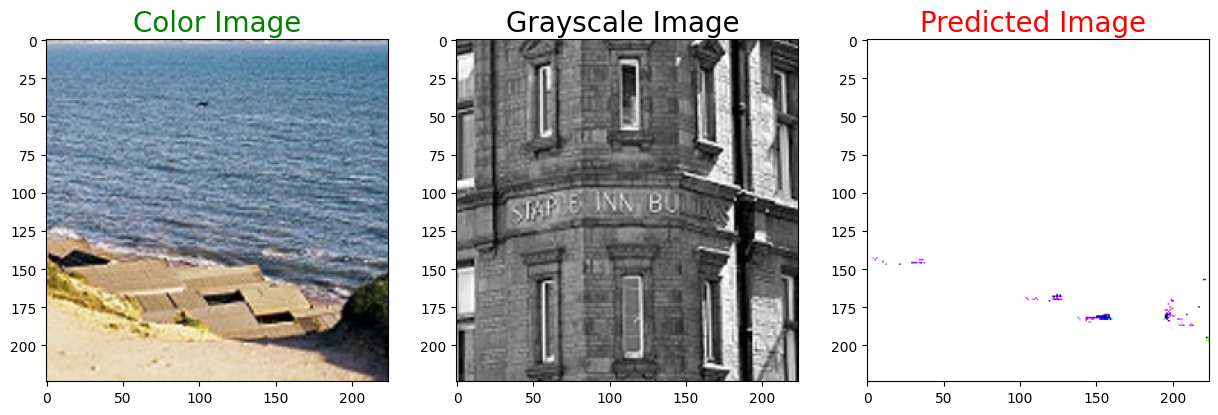

IndexError: index 7 is out of bounds for axis 0 with size 7

In [54]:
for i in range(3,10):
     plot_images(ggrgb[i],gray_img[i],predicted[i])